In [78]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

pd.options.mode.chained_assignment = None

from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

import dalex as dx

import pickle
import ast

import warnings
warnings.filterwarnings('ignore')

from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

## Dane z eksperymentów

In [79]:
rashomon_set_cv = 'CV_results_3_fixed.csv'
pca_plot = 'images/models_v4.png'
cluster_labels = 'clusters_param_based_v4.npy'

In [80]:
import re
from IPython.display import Image

In [81]:
colors = ['#e41a1c','#377eb8','#4daf4a','#984ea3']

In [82]:
# colors_2 = ['#e63032', '#4b8abf', '#5eb75c', '#a25fac']

In [83]:
clf_results_df = pd.read_csv(rashomon_set_cv, index_col = 0)

In [84]:
used_metrics = ['roc_auc', 'f1', 'accuracy']

In [85]:
clf_results_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_nrounds,param_min_child_weight,param_lambda,param_eta,param_colsample_bytree,param_colsample_bylevel,param_alpha,params,split0_test_roc_auc,split1_test_roc_auc,split2_test_roc_auc,split3_test_roc_auc,split4_test_roc_auc,mean_test_roc_auc,std_test_roc_auc,rank_test_roc_auc,split0_test_f1,split1_test_f1,split2_test_f1,split3_test_f1,split4_test_f1,mean_test_f1,std_test_f1,rank_test_f1,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,split3_test_accuracy,split4_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy
0,95.154803,0.358302,0.089161,0.029013,2222.0,5.039684,1024.000000,0.214311,0.666667,1.000000,0.462937,"{'nrounds': 2222.0, 'min_child_weight': 5.0396...",0.897217,0.901795,0.910609,0.912732,0.909569,0.906384,0.005889,52,0.415446,0.395257,0.419786,0.452288,0.470738,0.430703,0.027119,85,0.900656,0.896130,0.901766,0.905161,0.905840,0.901911,0.003493,52
1,28.921281,0.233345,0.065226,0.015251,1.0,14.813995,1024.000000,0.462937,0.666667,0.222222,0.004557,"{'nrounds': 1.0, 'min_child_weight': 14.813995...",0.903774,0.909427,0.915738,0.922497,0.913938,0.913075,0.006268,24,0.479401,0.447466,0.464061,0.477132,0.496910,0.472994,0.016502,71,0.905635,0.898846,0.903803,0.904255,0.907877,0.904083,0.002978,39
2,36.349588,0.684837,0.080186,0.012208,556.0,74.657859,0.099213,0.099213,0.555556,0.666667,0.462937,"{'nrounds': 556.0, 'min_child_weight': 74.6578...",0.905356,0.909130,0.920324,0.919083,0.912862,0.913351,0.005718,23,0.489950,0.458438,0.474619,0.489493,0.487562,0.480013,0.012167,64,0.908124,0.902693,0.906292,0.906519,0.906745,0.906075,0.001807,20
3,15.156764,0.944223,0.060239,0.007426,2222.0,1.714488,47.031504,0.214311,0.444444,0.000000,2.160119,"{'nrounds': 2222.0, 'min_child_weight': 1.7144...",0.893288,0.900965,0.909422,0.905425,0.902252,0.902270,0.005357,69,0.372414,0.376000,0.395693,0.396201,0.402130,0.388488,0.011932,99,0.897036,0.894094,0.898370,0.899276,0.898370,0.897429,0.001814,82
4,22.554977,3.077436,0.057845,0.016217,2222.0,43.545280,47.031504,0.099213,0.666667,0.444444,47.031504,"{'nrounds': 2222.0, 'min_child_weight': 43.545...",0.895339,0.897584,0.905250,0.910950,0.907365,0.903298,0.005915,66,0.383562,0.380697,0.383217,0.393443,0.434437,0.395071,0.020159,96,0.898167,0.895451,0.900181,0.899502,0.903350,0.899330,0.002581,74


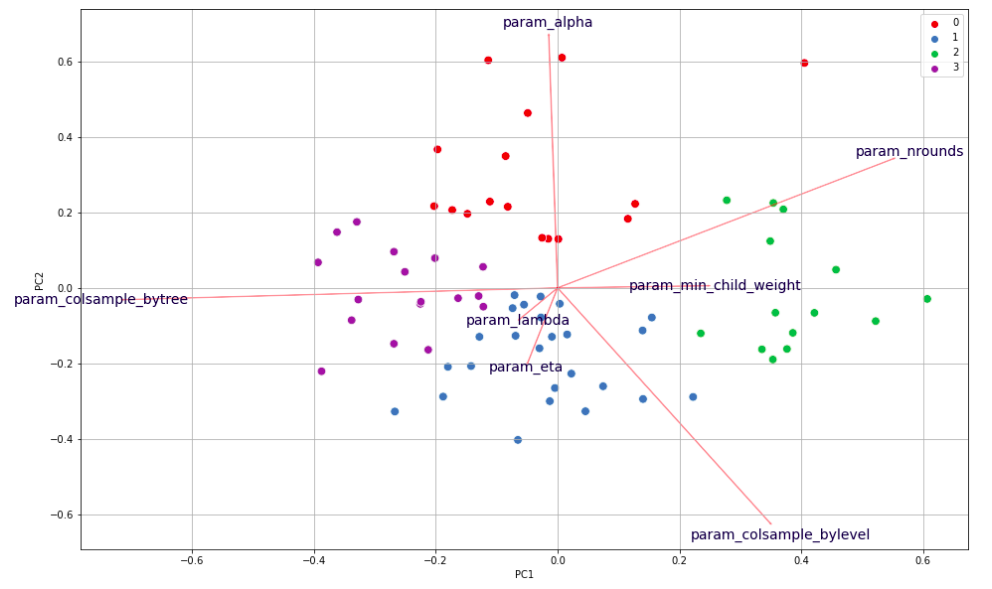

In [86]:
Image(filename=pca_plot)

In [89]:
clf_results_df['clusters'] = np.load(cluster_labels)

In [90]:
pd.set_option('display.max_columns', None)

In [91]:
clf_results_df_str = ' '.join(list(clf_results_df.columns))
params = re.findall("param_[a-z]*_?[a-z]*_?[a-z]*", clf_results_df_str)
mean_test = re.findall("mean_test_[a-z1]*_?[a-z]*_?[a-z]*", clf_results_df_str)
params_mean_test = params + mean_test
params_mean_test

['param_nrounds',
 'param_min_child_weight',
 'param_lambda',
 'param_eta',
 'param_colsample_bytree',
 'param_colsample_bylevel',
 'param_alpha',
 'mean_test_roc_auc',
 'mean_test_f1',
 'mean_test_accuracy']

**Średnie wartości hiperparametrów i wybranych metryk w zależnosci od przynależności modelu do danego klastra**

In [92]:
clf_results_df.groupby('clusters').mean()[params_mean_test]

,param_nrounds,param_min_child_weight,param_lambda,param_eta,param_colsample_bytree,param_colsample_bylevel,param_alpha,mean_test_roc_auc,mean_test_f1,mean_test_accuracy
clusters,,,,,,,,,,
0,2777.750000,26.709915,53.626457,0.261364,0.631944,0.354167,25.583305,0.907192,0.442313,0.901936
1,1400.280000,28.824675,97.020059,0.330919,0.613333,0.786667,0.401601,0.910326,0.491271,0.904632
2,4166.571429,38.688308,16.899565,0.279759,0.246032,0.777778,2.706487,0.911588,0.495256,0.905173
3,1340.058824,19.390203,88.505954,0.288348,0.849673,0.372549,0.868869,0.909967,0.472358,0.903979


In [93]:
clf_results_df.groupby('clusters').mean()[params]

,param_nrounds,param_min_child_weight,param_lambda,param_eta,param_colsample_bytree,param_colsample_bylevel,param_alpha
clusters,,,,,,,
0,2777.750000,26.709915,53.626457,0.261364,0.631944,0.354167,25.583305
1,1400.280000,28.824675,97.020059,0.330919,0.613333,0.786667,0.401601
2,4166.571429,38.688308,16.899565,0.279759,0.246032,0.777778,2.706487
3,1340.058824,19.390203,88.505954,0.288348,0.849673,0.372549,0.868869


In [94]:
clf_results_df.groupby('clusters').mean()[mean_test]

,mean_test_roc_auc,mean_test_f1,mean_test_accuracy
clusters,,,
0,0.907192,0.442313,0.901936
1,0.910326,0.491271,0.904632
2,0.911588,0.495256,0.905173
3,0.909967,0.472358,0.903979


### Wybieramy najlepsze modele z każdego z otrzymanych klastrów

In [95]:
def find_indexes(X, k):
    return  list(X.loc[X['rank_test_roc_auc'].isin(k),:].index)

In [96]:
def find_best_in_clusters(X):
    return X.groupby('clusters').min()['rank_test_roc_auc'].values

In [97]:
indexes_of_best =  find_indexes(clf_results_df, find_best_in_clusters(clf_results_df))

In [98]:
best_params = clf_results_df.iloc[pd.Index(indexes_of_best),:]['params']

In [99]:
best_params.reset_index(drop = True, inplace = True)

In [100]:
for params in best_params:
    print(params, "\n")

{'nrounds': 4444.0, 'min_child_weight': 2.9394689845511977, 'lambda': 0.004556754060844206, 'eta': 0.21431099571326834, 'colsample_bytree': 0.2222222222222222, 'colsample_bylevel': 0.6666666666666666, 'alpha': 10.079368399158989} 

{'nrounds': 1.0, 'min_child_weight': 25.398416831491197, 'lambda': 0.0009765625, 'eta': 0.09921256574801249, 'colsample_bytree': 0.4444444444444444, 'colsample_bylevel': 0.3333333333333333, 'alpha': 0.0009765625} 

{'nrounds': 1667.0, 'min_child_weight': 14.813995396596646, 'lambda': 219.45445961038678, 'eta': 0.21431099571326834, 'colsample_bytree': 0.8888888888888888, 'colsample_bylevel': 0.8888888888888888, 'alpha': 0.46293735614364534} 

{'nrounds': 4444.0, 'min_child_weight': 2.9394689845511977, 'lambda': 0.46293735614364534, 'eta': 0.09921256574801249, 'colsample_bytree': 0.5555555555555556, 'colsample_bylevel': 0.4444444444444444, 'alpha': 10.079368399158989} 



### Otrzymaliśmy zatem 4 modele. Czas je stworzyć i nauczyć.

#### Najpierw musimy jednak wczytać dane

In [101]:
def get_task(path):
    with open(path, 'rb') as f:
        labels = pickle.load(f)
    dct = {'mort':0, 'readmit': 1, 'los': 2, 'dx':3 }
    task = [yy[dct['mort']] for yy in labels]
    return np.array(task)

In [102]:
#Loading data
X = np.load("./local_mimic/save/X48.npy")
Z = np.load("./local_mimic/save/w2v.npy")
y = get_task("./local_mimic/save/y")

In [103]:
#Data transformations
X, Z, y = np.array(X), np.array(Z), np.array(y)
X = np.append(X, Z, axis=1)

In [104]:
X = pd.DataFrame(X)

In [105]:
### ast.literal_eval - zamiana stringa na dict
### ** po to aby xgboost wczytał podane parametry

xgb_1 = XGBClassifier(**ast.literal_eval(best_params[0]))
xgb_2 = XGBClassifier(**ast.literal_eval(best_params[1]))
xgb_3 = XGBClassifier(**ast.literal_eval(best_params[2]))
xgb_4 = XGBClassifier(**ast.literal_eval(best_params[3]))
#xgb_5 = XGBClassifier(**ast.literal_eval(best_params[4]))

# widzimy ze xgboost przyjal paramatery ktore powinnien
# print(best_params[4])
# xgb_5

In [106]:
models = [xgb_1, xgb_2, xgb_3, xgb_4]

In [107]:
for model in models:
    model.fit(X,y)

[22:10:45] WARNING: ../src/learner.cc:541: 
Parameters: { nrounds } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:10:45] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:10:51] WARNING: ../src/learner.cc:541: 
Parameters: { nrounds } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:10:51] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation 

In [108]:
xgb_1_exp = dx.Explainer(xgb_1,
                         X, y, label = "XGB 1")
xgb_2_exp = dx.Explainer(xgb_2,
                         X, y, label = "XGB 2")
xgb_3_exp = dx.Explainer(xgb_3,
                         X, y, label = "XGB 3")
xgb_4_exp = dx.Explainer(xgb_4,
                         X, y, label = "XGB 4")
# xgb_5_exp = dx.Explainer(xgb_5,
#                          X, y, label = "XGB 5")

Preparation of a new explainer is initiated

  -> data              : 27616 rows 276 cols
  -> target variable   : 27616 values
  -> model_class       : xgboost.sklearn.XGBClassifier (default)
  -> label             : XGB 1
  -> predict function  : <function yhat_proba_default at 0x7f2ec5a848b0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.000171, mean = 0.119, max = 0.999
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.938, mean = 2.01e-05, max = 0.993
  -> model_info        : package xgboost

A new explainer has been created!
Preparation of a new explainer is initiated

  -> data              : 27616 rows 276 cols
  -> target variable   : 27616 values
  -> model_class       : xgboost.sklearn.XGBClassifier (default)
  -> label             : XGB 2
  -> predict function  : <function yhat_proba_de

### Sprawdzamy istotność zmiennych

In [109]:
vi_xgb_1 = xgb_1_exp.model_parts()
vi_xgb_2 = xgb_2_exp.model_parts()
vi_xgb_3 = xgb_3_exp.model_parts()
vi_xgb_4 = xgb_4_exp.model_parts()
#vi_xgb_5 = xgb_5_exp.model_parts()

In [110]:
import inspect
# fajny pakiet mozna poogladac implementacje wszelakich metod

In [111]:
#print(inspect.getsource(al_xgb_1.plot))

In [112]:
print(inspect.getsource(vi_xgb_1.plot))

    def plot(self,
             objects=None,
             max_vars=10,
             digits=3,
             rounding_function=np.around,
             bar_width=16,
             split=("model", "variable"),
             title="Variable Importance",
             vertical_spacing=None,
             show=True):
        """Plot the Variable Importance explanation

        Parameters
        -----------
        objects : VariableImportance object or array_like of VariableImportance objects
            Additional objects to plot in subplots (default is `None`).
        max_vars : int, optional
            Maximum number of variables that will be presented for for each subplot
            (default is `10`).
        digits : int, optional
            Number of decimal places (`np.around`) to round contributions.
            See `rounding_function` parameter (default is `3`).
        rounding_function : function, optional
            A function that will be used for rounding numbers (default is 

In [113]:
inspect.getargspec(dx._theme.get_default_colors)

ArgSpec(args=['n', 'type'], varargs=None, keywords=None, defaults=None)

In [114]:
print(inspect.getsource(dx._theme.get_default_colors))

def _get_default_colors(n, type):
    """return default dalex colors"""
    default_colors = ["#8bdcbe", "#f05a71", "#371ea3", "#46bac2", "#ae2c87", "#ffa58c", "#4378bf"]

    if n > len(default_colors):
        ret = []
        for _ in range(np.ceil(n / len(default_colors)).astype(int)):
            ret += default_colors
        return ret

    bar_colors = {
        1: ["#46bac2"],
        2: ["#8bdcbe", "#4378bf"],
        3: ["#8bdcbe", "#4378bf", "#46bac2"],
        4: colors,
        5: ["#8bdcbe", "#f05a71", "#371ea3", "#46bac2", "#ffa58c"],
        6: ["#8bdcbe", "#f05a71", "#371ea3", "#46bac2", "#ae2c87", "#ffa58c"],
        7: default_colors
    }

    line_colors = {
        1: ["#46bac2"],
        2: ["#8bdcbe", "#4378bf"],
        3: ["#8bdcbe", "#f05a71", "#4378bf"],
        4: colors,
        5: ["#8bdcbe", "#f05a71", "#4378bf", "#ae2c87", "#ffa58c"],
        6: ["#8bdcbe", "#f05a71", "#46bac2", "#ae2c87", "#ffa58c", "#4378bf"],
        7: default_colors
    }

    if t

In [115]:
def _get_default_colors(n, type):
    """return default dalex colors"""
    default_colors = ["#8bdcbe", "#f05a71", "#371ea3", "#46bac2", "#ae2c87", "#ffa58c", "#4378bf"]

    if n > len(default_colors):
        ret = []
        for _ in range(np.ceil(n / len(default_colors)).astype(int)):
            ret += default_colors
        return ret

    bar_colors = {
        1: ["#46bac2"],
        2: ["#8bdcbe", "#4378bf"],
        3: ["#8bdcbe", "#4378bf", "#46bac2"],
        4: colors,
        5: ["#8bdcbe", "#f05a71", "#371ea3", "#46bac2", "#ffa58c"],
        6: ["#8bdcbe", "#f05a71", "#371ea3", "#46bac2", "#ae2c87", "#ffa58c"],
        7: default_colors
    }

    line_colors = {
        1: ["#46bac2"],
        2: ["#8bdcbe", "#4378bf"],
        3: ["#8bdcbe", "#f05a71", "#4378bf"],
        4: colors,
        5: ["#8bdcbe", "#f05a71", "#4378bf", "#ae2c87", "#ffa58c"],
        6: ["#8bdcbe", "#f05a71", "#46bac2", "#ae2c87", "#ffa58c", "#4378bf"],
        7: default_colors
    }

    if type == 'bar':
        return bar_colors[n]
    elif type == 'line':
        return line_colors[n]
    else:
        return bar_colors[n]

In [116]:
dx._theme.get_default_colors = _get_default_colors

In [117]:
#vi_xgb_1.plot([vi_xgb_2, vi_xgb_3, vi_xgb_4, vi_xgb_5])
vi_xgb_1.plot([vi_xgb_2, vi_xgb_3, vi_xgb_4])

In [118]:
def get_k_best_variables(vi_model, k):
    return set(vi_model.result.sort_values(by = 'dropout_loss', ascending = False)[1:k].variable)

In [119]:
important_variables = set.intersection(get_k_best_variables(vi_xgb_1, 17),
                                      get_k_best_variables(vi_xgb_2, 17),
                                      get_k_best_variables(vi_xgb_3, 17),
                                      get_k_best_variables(vi_xgb_4, 17),
                                      #get_k_best_variables(vi_xgb_5, 17)
                                      )

In [120]:
important_variables

{40, 97, 115, 118, 231}

### Partial-dependence (PD) plots

In [121]:
pd_xgb_1 = xgb_1_exp.model_profile(variables = list(important_variables))
pd_xgb_2 = xgb_2_exp.model_profile(variables = list(important_variables))
pd_xgb_3 = xgb_3_exp.model_profile(variables = list(important_variables))
pd_xgb_4 = xgb_4_exp.model_profile(variables = list(important_variables))
#pd_xgb_5 = xgb_5_exp.model_profile(variables = list(important_variables))

Calculating ceteris paribus: 100%|██████████| 5/5 [00:00<00:00,  5.57it/s]


In [122]:
#pd_xgb_1.plot([pd_xgb_2, pd_xgb_3, pd_xgb_4, pd_xgb_5])
pd_xgb_1.plot([pd_xgb_2, pd_xgb_3, pd_xgb_4])

### Accumulated-local (ALE) Profiles

In [123]:
al_xgb_1 = xgb_1_exp.model_profile(variables = list(important_variables), type = 'accumulated')
al_xgb_2 = xgb_2_exp.model_profile(variables = list(important_variables), type = 'accumulated')
al_xgb_3 = xgb_3_exp.model_profile(variables = list(important_variables), type = 'accumulated')
al_xgb_4 = xgb_4_exp.model_profile(variables = list(important_variables), type = 'accumulated')
#al_xgb_5 = xgb_5_exp.model_profile(variables = list(important_variables), type = 'accumulated')

Calculating accumulated dependency: 100%|██████████| 5/5 [00:00<00:00,  9.46it/s]


In [124]:
#al_xgb_1.plot([al_xgb_2, al_xgb_3, al_xgb_4, al_xgb_5])
al_xgb_1.plot([al_xgb_2, al_xgb_3, al_xgb_4])

In [125]:
#al_models = [al_xgb_1, al_xgb_2, al_xgb_3, al_xgb_4, al_xgb_5]
al_models = [al_xgb_1, al_xgb_2, al_xgb_3, al_xgb_4]

In [126]:
#pd_models = [pd_xgb_1, pd_xgb_2, pd_xgb_3, pd_xgb_4, pd_xgb_5]
pd_models = [pd_xgb_1, pd_xgb_2, pd_xgb_3, pd_xgb_4]

In [127]:
for al_model in al_models:
    al_model.result['_label_'] = [x + ' AL profiles' for x in al_model.result['_label_']]

In [128]:
#for i in range(5):
#tu tez mozna poprawic te kolory (dalem wyzej colors_2 może beda pasować) ale nie wiem czy z tego tez korzystamy
for i in range(4):
    al_models[i].plot(pd_models[i])

## Wykresy zależności miary jakości modelu w zależności od zmienianych hiperparametrów

#### Update - dodaliśmy skalę logarytmiczną

In [133]:
#params = ['nrounds', 'min_child_weight', 'lambda', 'eta', 'colsample_bytree', 'colsample_bylevel', 'alpha']
params = ['eta', 'colsample_bylevel', 'alpha']

In [134]:
logs = [True, False, True]

In [145]:
def plot_one_param(df, param, metrics, log, best_params=best_params):
    fig, axs = plt.subplots(1, 3, sharey=True, figsize=(11,4))
    
    df_processed = df.groupby('param_'+param).mean()
    
    x = [ast.literal_eval(best)[param] for best in best_params]
    z=[0,1,2,3]
    
    for i in range(3):
        
        sns.lineplot(ax = axs[i], data = df_processed, x='param_'+param, y = 'mean_test_' + metrics[i])
        axs[i].set_ylabel('mean test score', fontsize = 14)
        axs[i].set_xlabel("")
        xlabel = "param_"+param
        if log:
            axs[i].set(xscale="log")
            xlabel = "log(" + xlabel+")"
        if i==1:
            axs[i].set_xlabel(xlabel, fontsize = 12)
        
        y = df.loc[indexes_of_best, 'mean_test_'+metrics[i]]
        temp = pd.DataFrame({'x':x,'y':y,'z':z})
        
        sns.scatterplot(ax=axs[i], data = temp, x=x,y=y,hue=z,palette=colors, legend=False, s=50, alpha=0.5)
        
        axs[i].set_title(metrics[i])

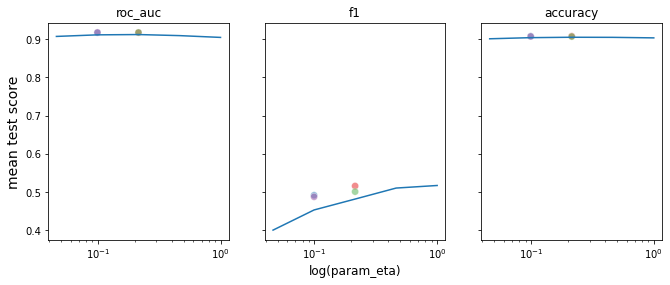

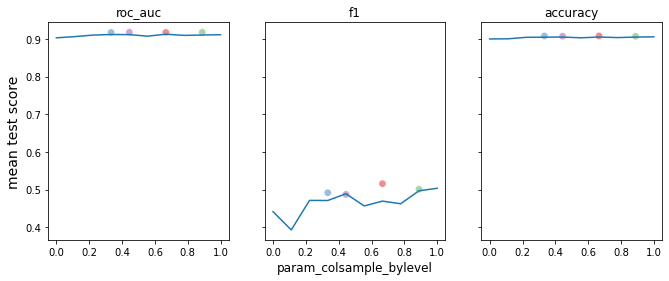

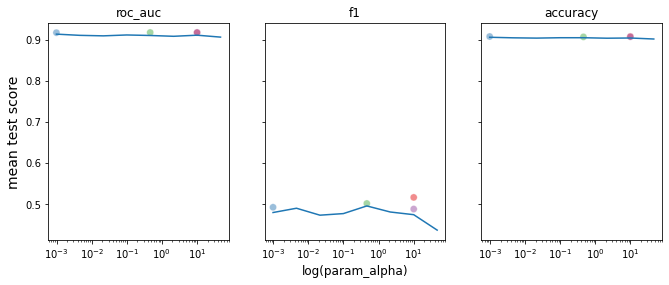

In [146]:
for param, log in zip(params, logs):
    plot_one_param(clf_results_df, param, used_metrics, log)

Requirements:
* xgboost==1.3.3
* seaborn==0.11.1
* scikit-learn==0.24.1
* pandas==1.2.3
* numpy==1.20.1
* matplotlib==3.3.4
* dalex==1.0.1